Plotting Graph

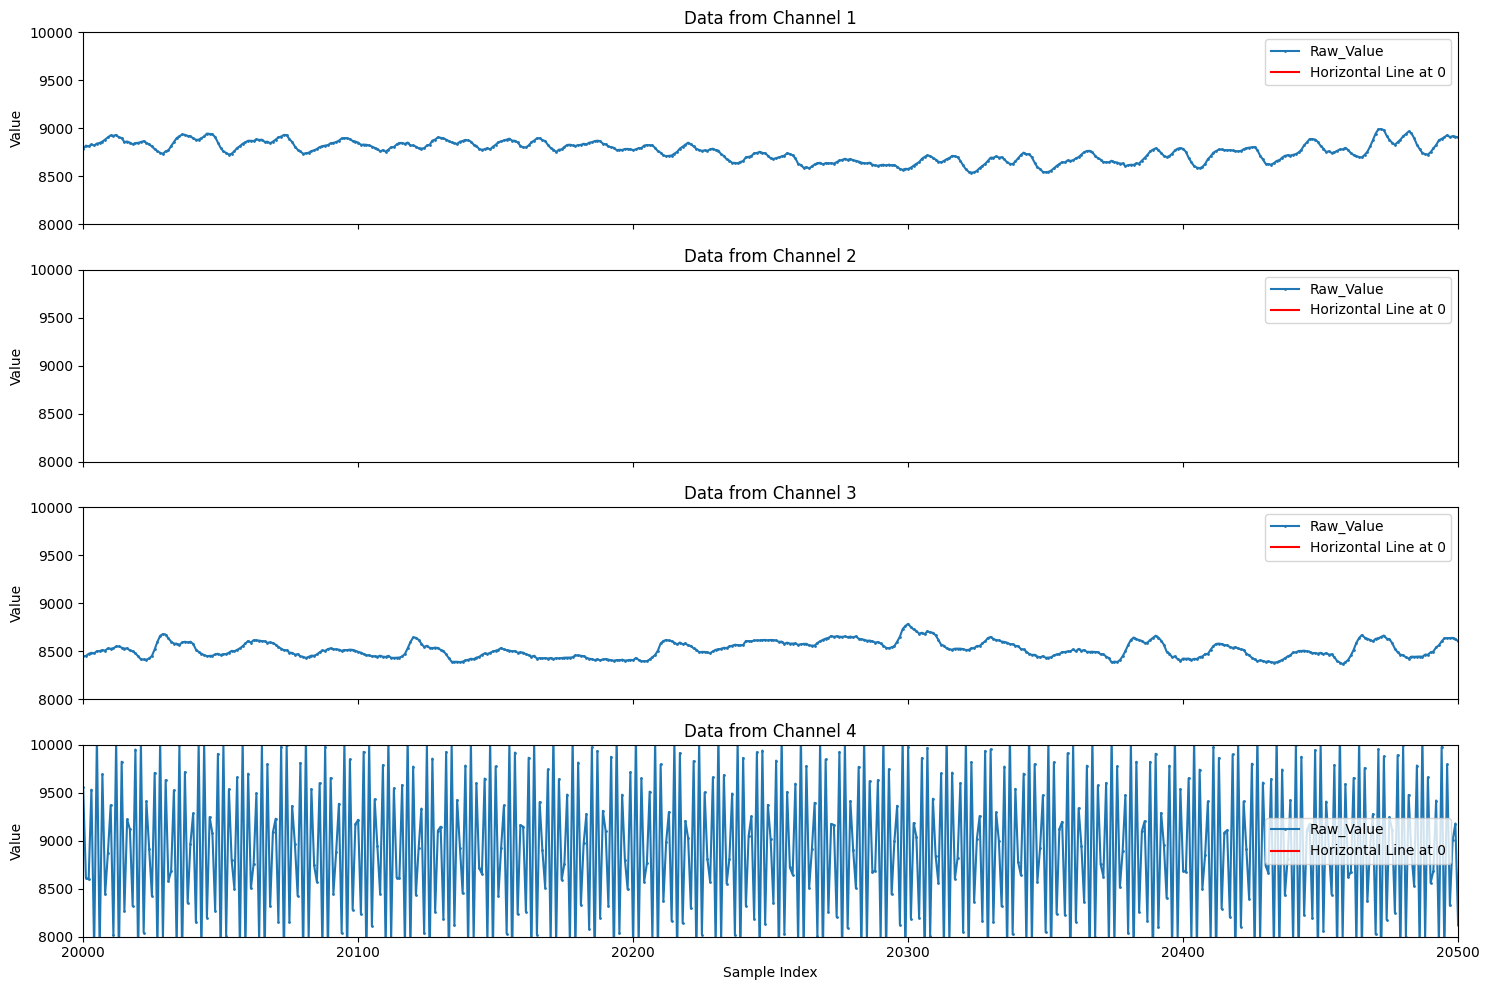

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# List of CSV file names with full file paths (modify with your actual file paths)
csv_file = r"c:\Users\Amarjith CK\Downloads\modified-matlab-code\040821-0410PM.csv"
selected_time_range = [30,40]
lower_limit = selected_time_range[0]
upper_limit = selected_time_range[1]

# Set the figure size
fig, axs = plt.subplots(4, figsize=(15, 10), sharex=True)

# Define the horizontal line value (modify as needed)
horizontal_line_value = 0  # Change this value to your desired horizontal line value

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file)
#df['Time'] = pd.to_datetime(df['Timestamp'])
# Extract raw data from all four columns
raw_data_ch1 = df["Channel 1"]
raw_data_ch2 = df["Channel 2"]
raw_data_ch3 = df["Channel 3"]
raw_data_ch4 = df["Channel 4"]

# Create labels for the four subplots
labels = ["Channel 1", "Channel 2", "Channel 3", "Channel 4"]

# Loop through each channel and plot the data on the corresponding subplot
for i, (raw_data, label) in enumerate(zip([raw_data_ch1, raw_data_ch2, raw_data_ch3, raw_data_ch4], labels)):
    axs[i].plot(raw_data, label="Raw_Value", linestyle="-", marker="o", markersize=1)
    
    # Add a horizontal line to the subplot
    axs[i].axhline(horizontal_line_value, color='red', label=f'Horizontal Line at {horizontal_line_value}')

    # Set plot labels and title
    axs[i].set_ylabel("Value")
    axs[i].set_title(f"Data from {label}")

    #axs[i].set_ylim(8000, 10000)
    #axs[i].set_xlim(20000,20500)
    # Show the x-axis and y-axis
    axs[i].xaxis.set_visible(True)
    axs[i].yaxis.set_visible(True)

    # Add a legend
    axs[i].legend()

# Set common x-axis label
axs[-1].set_xlabel("Sample Index")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


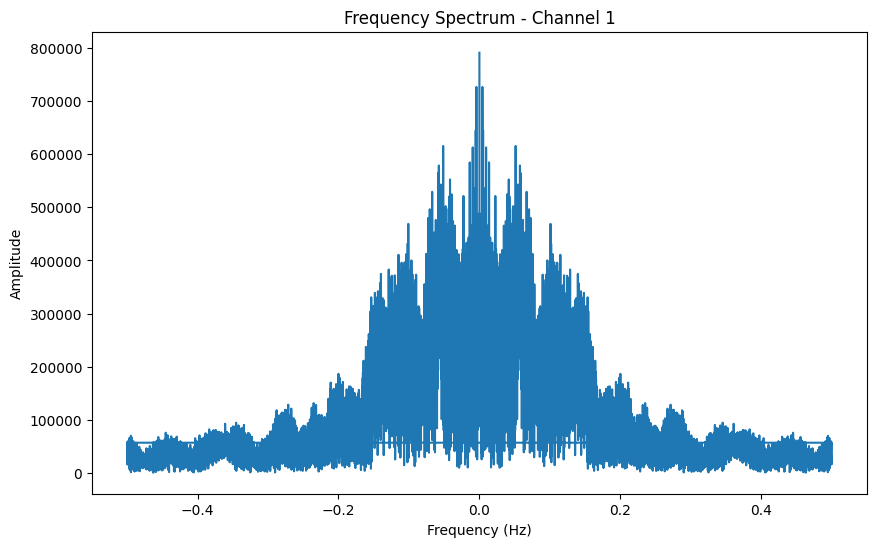

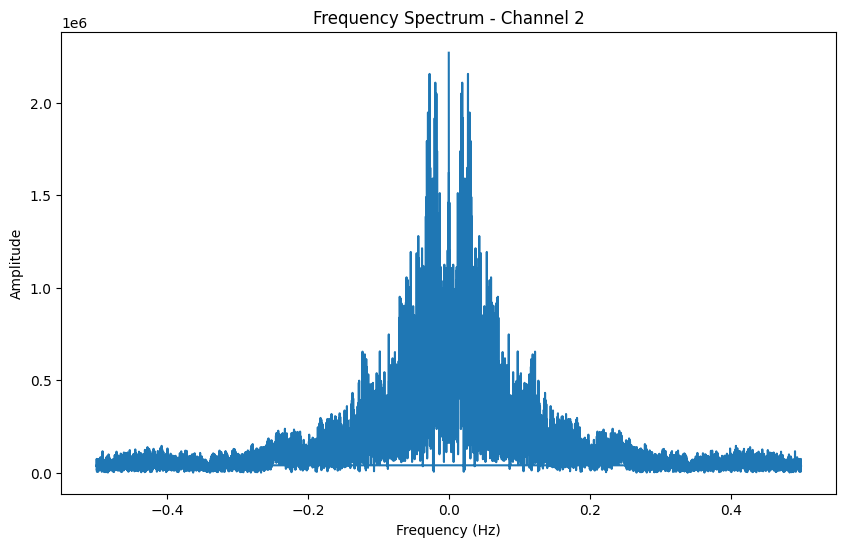

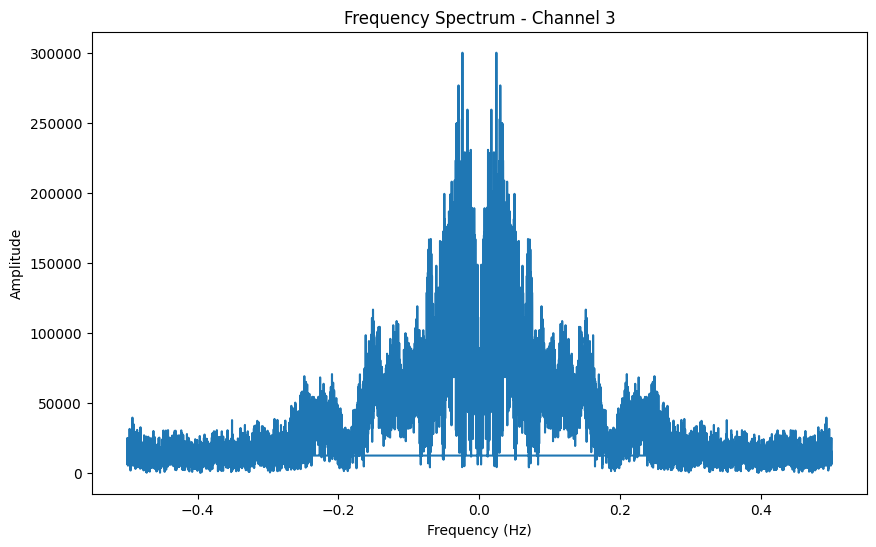

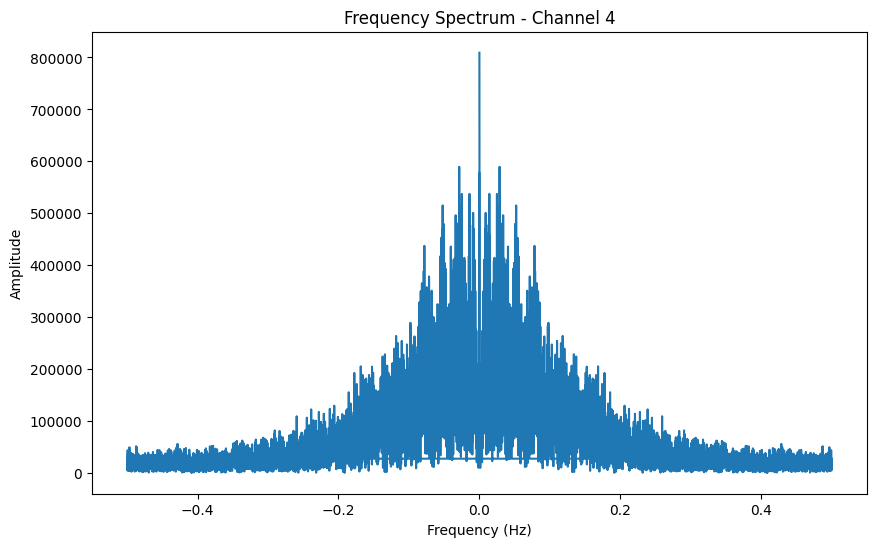

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV file
file_path = 'adc_data.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Assuming the columns are named 'Channel1', 'Channel2', 'Channel3', 'Channel4'
channels = ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4']

# Perform FFT for each channel
for channel in channels:
    data = df[channel]
    fs = 1 / (data.index[1] - data.index[0])  # Calculate sampling frequency
    n = len(data)
    fft_values = np.fft.fft(data)
    fft_freq = np.fft.fftfreq(n, d=1/fs)

    # Plot the frequency spectrum
    plt.figure(figsize=(10, 6))
    plt.plot(fft_freq, np.abs(fft_values))
    plt.title(f'Frequency Spectrum - {channel}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# Load data from CSV file
file_path = r"C:\Users\Amarjith CK\Downloads\adc_data.csv"  # Replace with your actual file path
df = pd.read_csv(file_path, parse_dates=['Timestamp'])

# Extract time and Channel 3 data
t = df['Timestamp']
channel_3_data = df['Channel 3']

# Calculate the time difference between consecutive samples
dt = (t - t.shift()).mean()

# Define bandpass filter parameters
fs = 1 / dt.total_seconds()  # Calculate sampling frequency from time array
lowcut = 1  # Lower cutoff frequency in Hz
highcut = 10  # Upper cutoff frequency in Hz
order = 4  # Filter order

# Create bandpass filter
b, a = butter(order, [lowcut, highcut], btype='band', fs=fs)

# Apply bandpass filter to Channel 3 data
filtered_channel_3 = filtfilt(b, a, channel_3_data)

# Convert time to minutes
t_minutes = (t - t.min()) / pd.Timedelta(minutes=1)

# Plot original and filtered Channel 3 signals
plt.figure(figsize=(10, 6))
plt.plot(t_minutes, channel_3_data, label='Original Channel 3')
plt.plot(t_minutes, filtered_channel_3, label='Filtered Channel 3')
plt.title('Channel 3 Signal and Bandpass Filtering')
plt.xlabel('Time (minutes)')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim(0, 2)  # Set x-axis limits to one-minute interval
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# Load data from CSV file
file_path = r"C:\Users\Amarjith CK\Downloads\adc_data.csv"  # Replace with your actual file path
df = pd.read_csv(file_path, parse_dates=['Timestamp'])

# Extract time and Channel 3 data
t = df['Timestamp']
channel_3_data = df['Channel 3']

# Calculate the time difference between consecutive samples
dt = (t - t.shift()).mean()

# Define bandpass filter parameters
fs = 1 / dt.total_seconds()  # Calculate sampling frequency from time array
lowcut = 1  # Lower cutoff frequency in Hz
highcut = 10  # Upper cutoff frequency in Hz
order = 4  # Filter order

# Create bandpass filter
b, a = butter(order, [lowcut, highcut], btype='band', fs=fs)

# Apply bandpass filter to Channel 3 data
filtered_channel_3 = filtfilt(b, a, channel_3_data)

# Calculate the FFT
n = len(filtered_channel_3)
freq = np.fft.fftfreq(n, d=dt.total_seconds())
fft_values = np.fft.fft(filtered_channel_3)
fft_magnitude = np.abs(fft_values)

# Plot the frequency domain representation
plt.figure(figsize=(10, 6))
plt.plot(freq, fft_magnitude)
plt.title('Frequency Domain Representation of Filtered Channel 3')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(2, 2.5)  # Set x-axis limits (adjust as needed)
plt.show()


In [ ]:
import pandas as pd
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt
import numpy as np

def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    
    # Adjust padlen based on the length of the input signal
    padlen = min(27, len(data) // 2 - 1)
    
    y = filtfilt(b, a, data, padlen=padlen)
    return y

# Read CSV file using pandas
file_path = r"C:\Users\Amarjith CK\Downloads\adc_data_without.csv"  # Replace with your actual file path
df = pd.read_csv(file_path, parse_dates=['Timestamp'], index_col='Timestamp')

# Extract BCG data from channel 3
bcg_channel_3 = df['Channel 3'].values

# Set sampling frequency based on your data
fs = 1000  # Replace with your actual sampling frequency

# Set time vector
t = np.arange(0, len(bcg_channel_3)) / fs

# Print relevant information
print("Length of BCG data:", len(bcg_channel_3))
print("Start time:", t[0])
print("End time:", t[-1])

# Find the indices for the specified time window (-500 to 500)
start_index = np.argmax(t >= 0)
end_index = np.argmax(t >= 5.724)

# Print the indices for the specified time window
print("Start index:", start_index)
print("End index:", end_index)
fig, axs = plt.subplots( figsize=(15, 10), sharex=True)

# Check if the time window is within the range of the data
if start_index < len(t) and end_index < len(t) and start_index < end_index:
    filtered_bcg_channel_3 = butter_bandpass_filter(
        bcg_channel_3[start_index:end_index],
        lowcut=0.1,
        highcut=20.0,
        fs=fs,
        order=4
    )

    # Plot the original and filtered BCG signals
    plt.plot(t[start_index:end_index], bcg_channel_3[start_index:end_index], label='Original BCG Signal (Channel 3)')
    plt.plot(t[start_index:end_index], filtered_bcg_channel_3, label='Filtered BCG Signal')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.ylim(-1000,1000)
    plt.xlim(0,2)
    plt.legend()
    plt.show()
else:
    print("Selected time window is outside the range of the data.")


50Hz notch filter

In [13]:
import pandas as pd
import numpy as np
from scipy.signal import iirnotch
import matplotlib.pyplot as plt

# Load data from CSV file
file_path = 'adc_data.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Assuming 'Channel 3' is the column containing the signal data
data = df['Channel 3'].values

# Sampling frequency (adjust accordingly based on your data)
fs = 1  # Assuming the data is sampled at 1 Hz, adjust this based on your actual sampling rate

# Design notch filter at 50Hz
f0 = 50.0  # Frequency to be removed from the signal
Q = 30.0  # Quality factor
nyquist = 0.5 * fs
f0_normalized = f0 / nyquist
b, a = iirnotch(f0_normalized, Q)

# Apply the notch filter
filtered_data = np.convolve(data, b/a, mode='same')

# Plot original and filtered data
plt.figure(figsize=(10, 6))
plt.plot(df.index, data, label='Original Data')
plt.plot(df.index, filtered_data, label='Filtered Data')
plt.title('50Hz Notch Filtered Data - Channel 3')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


ValueError: w0 should be such that 0 < w0 < 1